# 米IT企業の株価分析
# 2016.2.22~2017.2.22

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas.io.data import DataReader

/Users/waka/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
from datetime import datetime

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day )

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo',start,end)

In [10]:
AAPL.describe()

#open 常　#High その日の高値　#Low その日の低値　#Close 終値　#Volume 取引高　

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,108.002302,108.891468,107.338532,108.191309,3.491353e+07,106.992016
std,9.657051,9.678124,9.752676,9.764332,1.516814e+07,10.156388
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,99.257502,100.332501,98.670000,99.785002,2.612772e+07,98.314154
50%,108.549999,109.024997,107.814999,108.470001,3.101155e+07,107.227313
75%,114.309998,115.332498,113.459997,114.164999,3.765552e+07,113.417199
max,135.669998,136.270004,135.100006,135.720001,1.146021e+08,135.720001


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-02-22 to 2017-02-17
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


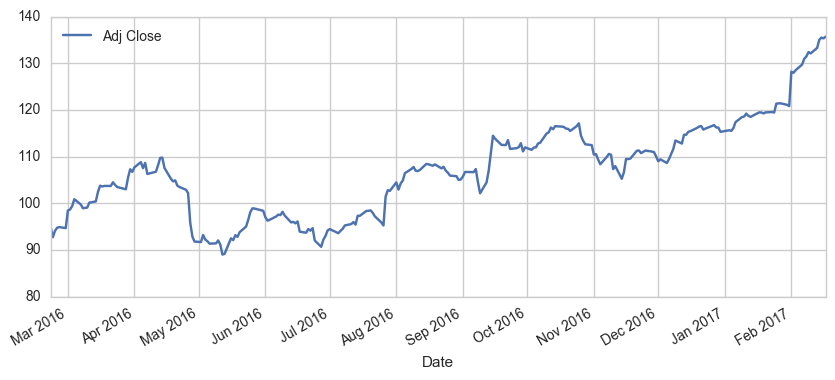

In [12]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

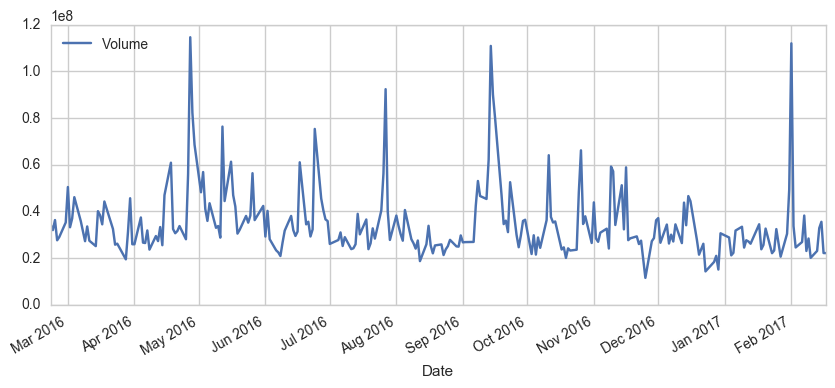

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [16]:
#移動平均線MA：10日や20日の株価を平均して滑らかな線を描く

ma_day =[10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] =pd.rolling_mean(AAPL['Adj Close'], ma)

/Users/waka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/waka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/waka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [17]:
AAPL.head()

#最低でも10日経たなければ計算できない

,Open,High,Low,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2016-02-22,96.309998,96.900002,95.919998,96.879997,34280800,94.874329,NaN,NaN,NaN
2016-02-23,96.400002,96.500000,94.550003,94.690002,31942600,92.729673,NaN,NaN,NaN
2016-02-24,93.980003,96.379997,93.320000,96.099998,36255700,94.110479,NaN,NaN,NaN
2016-02-25,96.050003,96.760002,95.250000,96.760002,27582700,94.756818,NaN,NaN,NaN
2016-02-26,97.199997,98.019997,96.580002,96.910004,28991100,94.903715,NaN,NaN,NaN


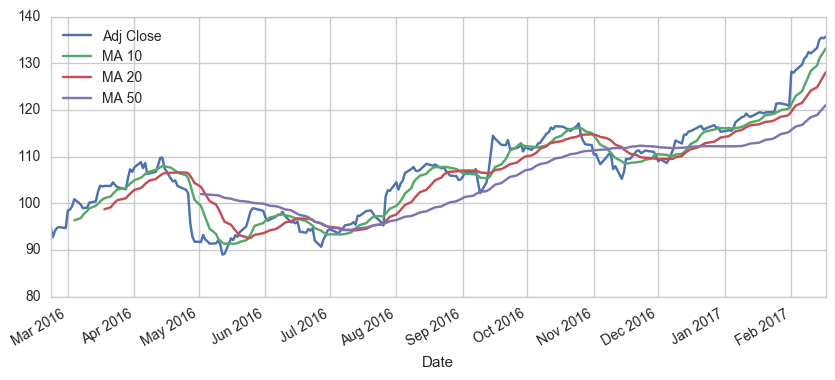

In [18]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

In [19]:
#終日の終値からの変化

AAPL['Daily Return'] =AAPL['Adj Close'].pct_change()

In [20]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2016-02-22,96.309998,96.900002,95.919998,96.879997,34280800,94.874329,NaN,NaN,NaN,NaN
2016-02-23,96.400002,96.500000,94.550003,94.690002,31942600,92.729673,NaN,NaN,NaN,-0.022605
2016-02-24,93.980003,96.379997,93.320000,96.099998,36255700,94.110479,NaN,NaN,NaN,0.014891
2016-02-25,96.050003,96.760002,95.250000,96.760002,27582700,94.756818,NaN,NaN,NaN,0.006868
2016-02-26,97.199997,98.019997,96.580002,96.910004,28991100,94.903715,NaN,NaN,NaN,0.001550


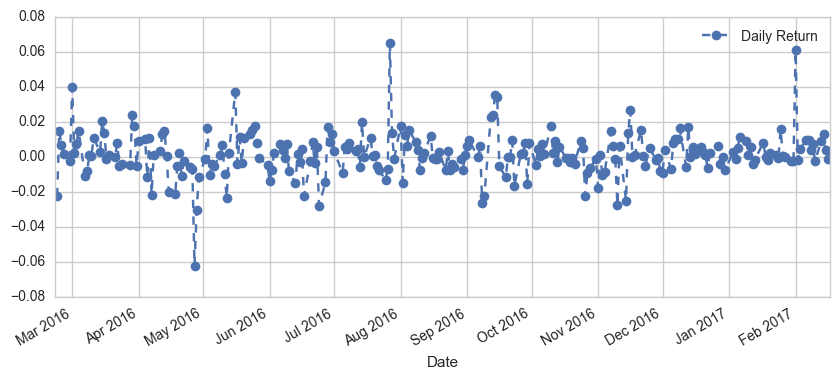

In [21]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True,linestyle='--',marker='o')

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


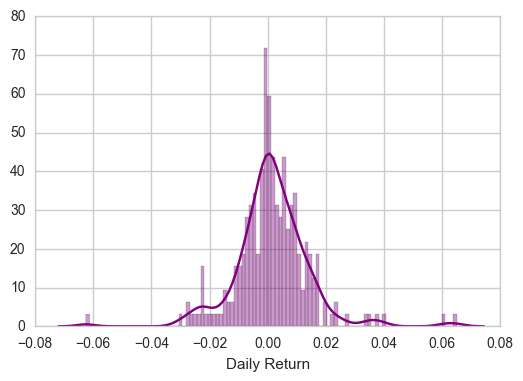

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

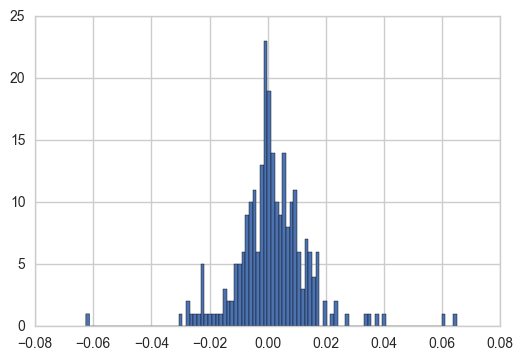

In [23]:
AAPL['Daily Return'].hist(bins=100)

In [26]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-22,94.874329,559.500000,706.460022,51.300774
2016-02-23,92.729673,552.940002,695.849976,49.868443
2016-02-24,94.110479,554.039978,699.559998,50.043831
2016-02-25,94.756818,555.150024,705.750000,50.764865
2016-02-26,94.903715,555.229980,705.070007,49.985367


In [28]:
tech_rets =closing_df.pct_change()

In [29]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-22,NaN,NaN,NaN,NaN
2016-02-23,-0.022605,-0.011725,-0.015019,-0.027920
2016-02-24,0.014891,0.001989,0.005332,0.003517
2016-02-25,0.006868,0.002004,0.008848,0.014408
2016-02-26,0.001550,0.000144,-0.000964,-0.015355


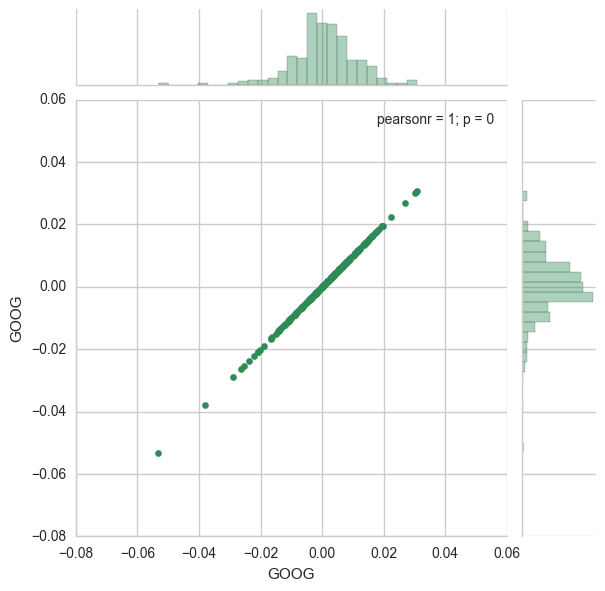

In [33]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter', color='seagreen')

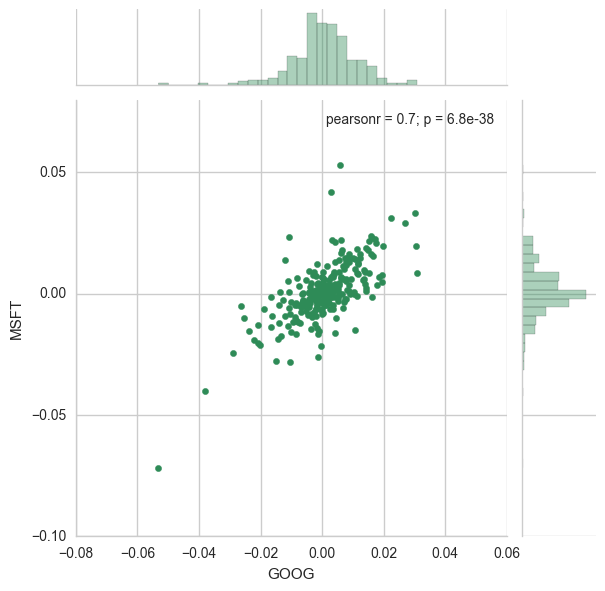

In [34]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter', color='seagreen')

#Googleとマイクロソフトは正の相関

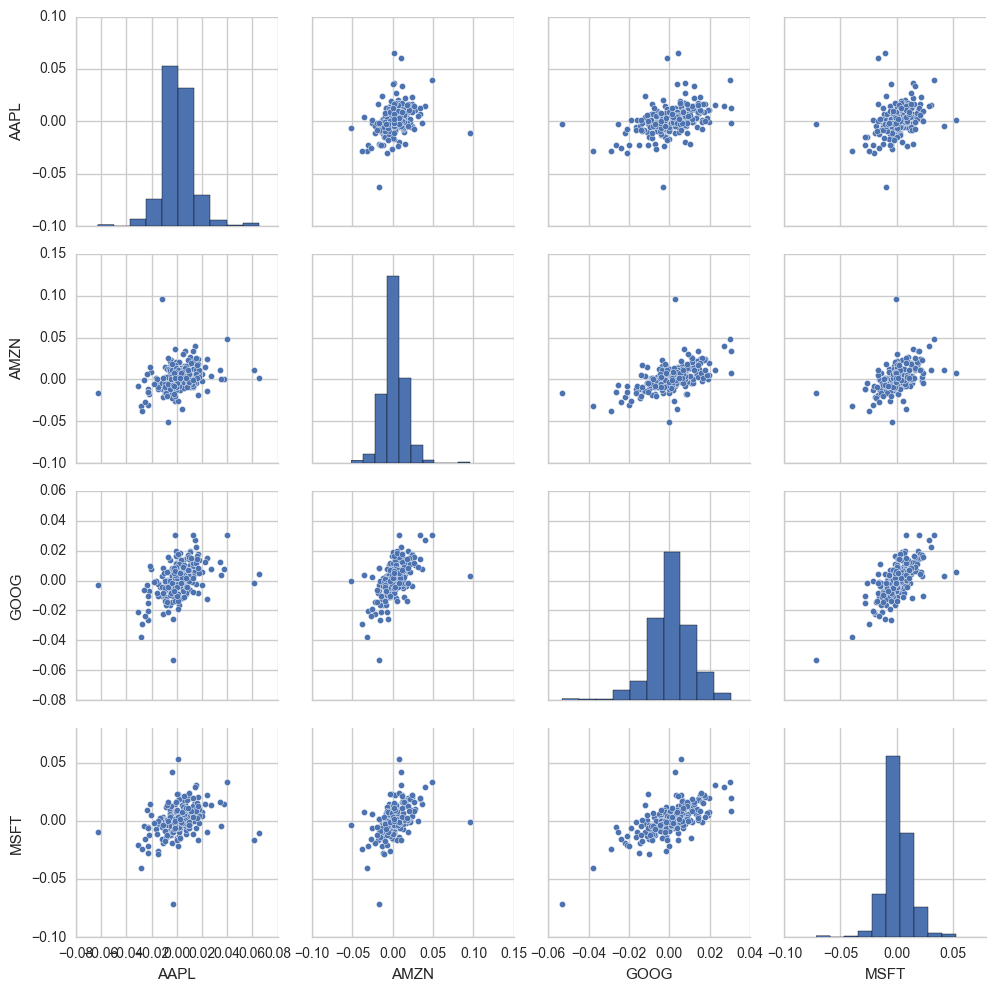

In [37]:
sns.pairplot(tech_rets.dropna())

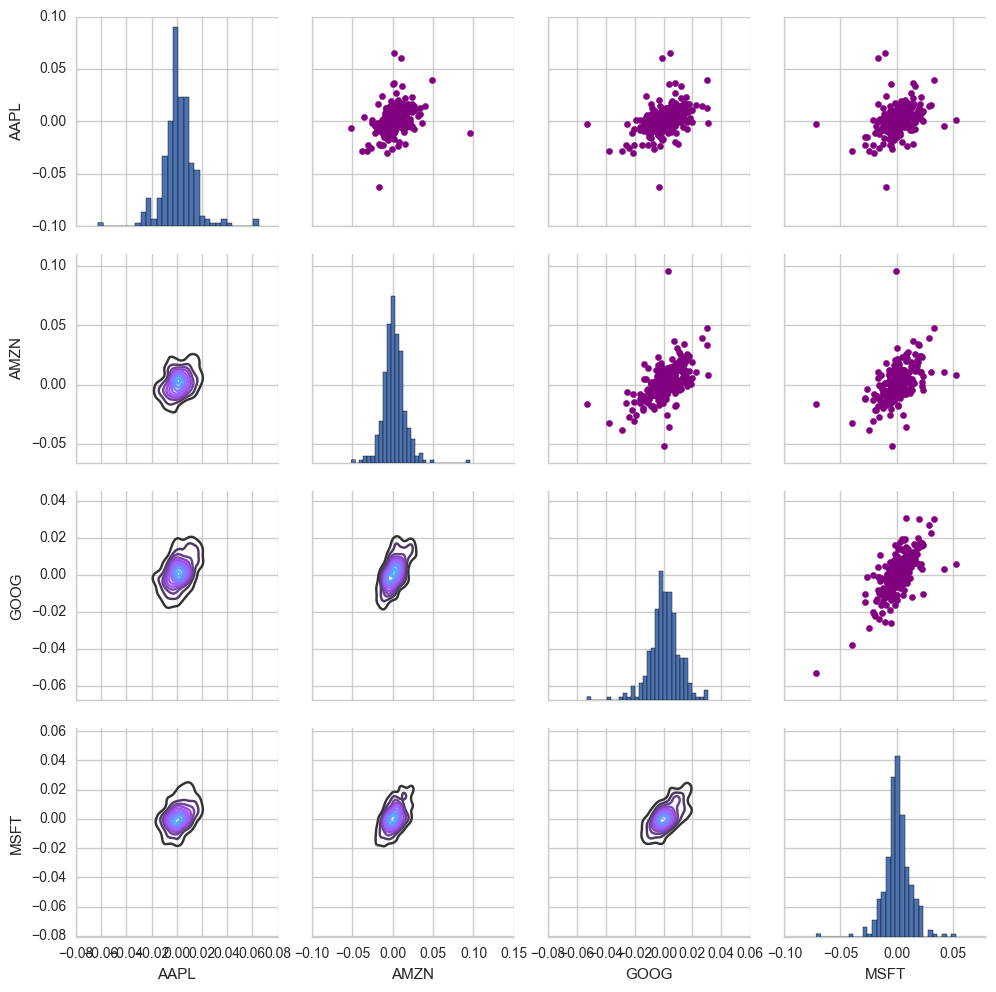

In [38]:
returns_fig =sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

#対角線上はヒストグラム
#右上スキャッタープロット
#左下カーネル密度推定

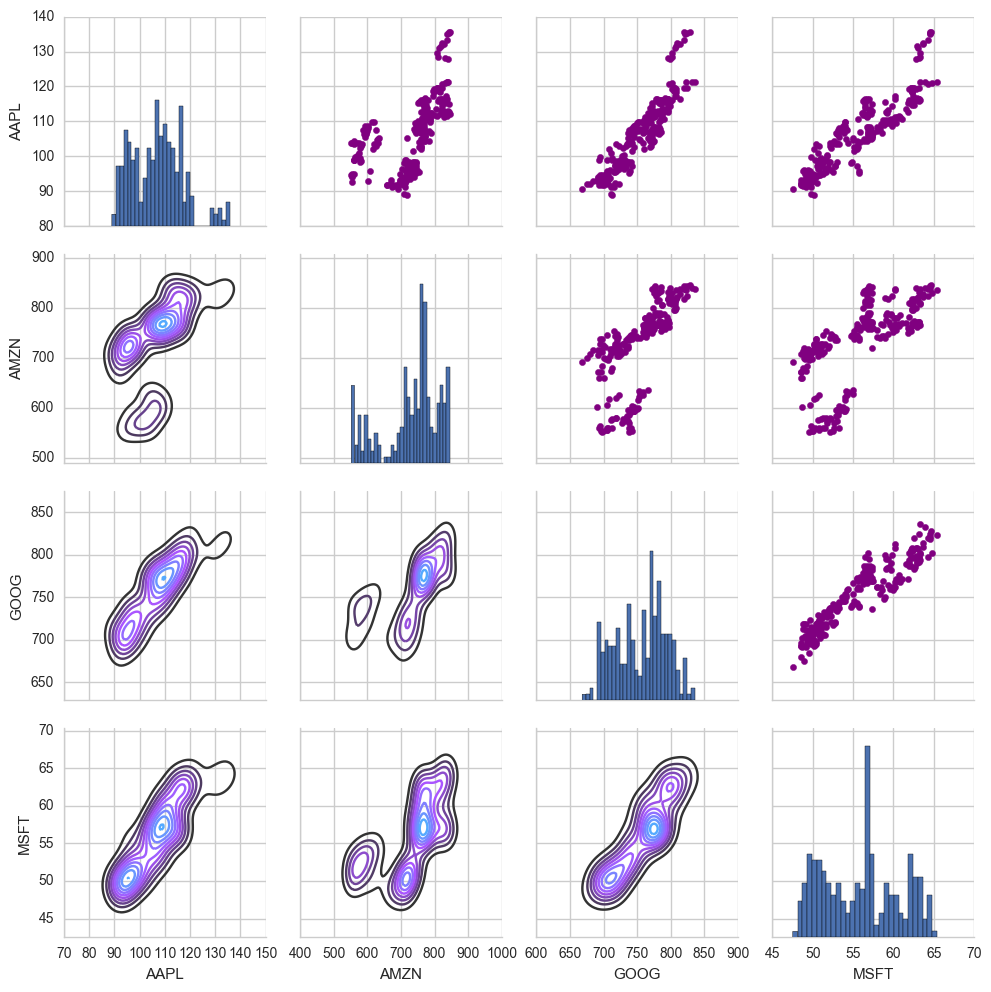

In [40]:
returns_fig =sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

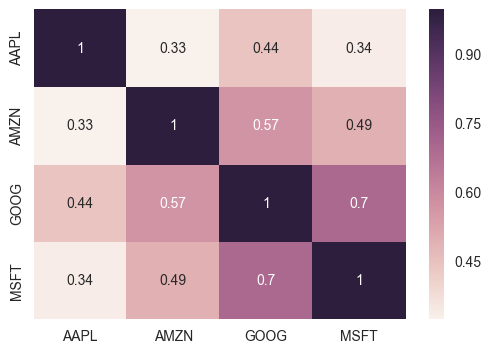

In [42]:
sns.heatmap(tech_rets.corr(),annot=True)

#どのＩＴ企業も基本は正の相関
#非常に相関がある

In [43]:
rets = tech_rets.dropna()

In [44]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-23,-0.022605,-0.011725,-0.015019,-0.027920
2016-02-24,0.014891,0.001989,0.005332,0.003517
2016-02-25,0.006868,0.002004,0.008848,0.014408
2016-02-26,0.001550,0.000144,-0.000964,-0.015355
2016-02-29,-0.002270,-0.004881,-0.010354,-0.008187


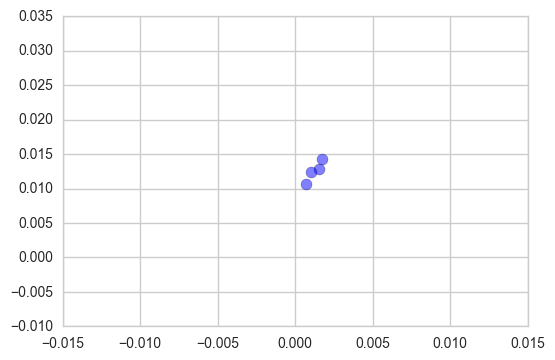

In [45]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s= np.pi*20)

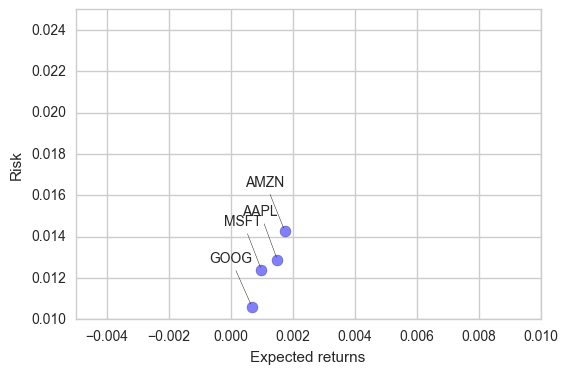

In [52]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s= np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y),xytext=(0,30),
                textcoords ='offset points', ha= 'right',va='bottom',
                arrowprops=dict(arrowstyle='-',connectionstyle='arc3'))
    
    #変動が激しいとリスクが高い
    #amazonはハイリスク、ハイリターン
    #googleはローリスク、ローリターン

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


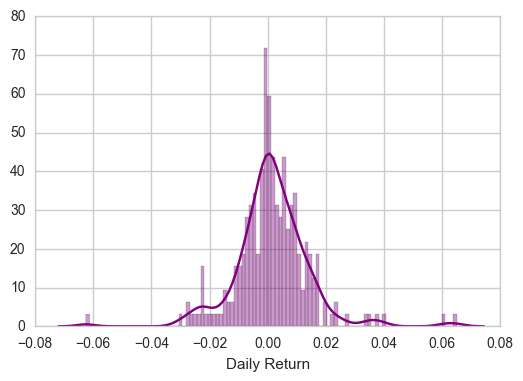

In [53]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
rets['AAPL'].quantile(0.05)

#1日なら95％の可能性で2％よりも損することはない
#95%信頼区間

-0.02082309695157375

In [55]:
#1年後のValue at Risk #ブラウン運動モデル
#ランダムを使ったシミュレーション、モンテカルロ法

days =365
dt =1/days
mu= rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [57]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price =np.zeros(days)
    price[0] =start_price
    shock =np.zeros(days)
    drift =np.zeros(days)
    
    for x in range(1,days):
        shock[x] =np.random.normal(loc=mu*dt,scale=sigma * np.sqrt(dt))
        drift[x] =mu*dt
        price[x] =price[x-1]+(price[x-1]*(drift[x]+shock[x]) )
    return price

In [58]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-22,707.450012,713.239990,702.510010,706.460022,1949800,706.460022
2016-02-23,701.450012,708.400024,693.580017,695.849976,2009300,695.849976
2016-02-24,688.919983,700.000000,680.780029,699.559998,1963600,699.559998
2016-02-25,700.010010,705.979980,690.585022,705.750000,1642200,705.750000
2016-02-26,708.580017,713.429993,700.859985,705.070007,2243500,705.070007


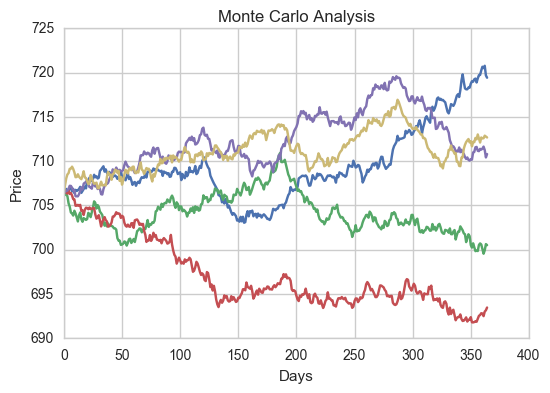

In [60]:
start_price =GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

#1年後の株価を予測（５通り）

In [61]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 678.2781614 ,  678.58367405,  678.8891867 , ...,  738.76966605,
         739.0751787 ,  739.38069135]),
 <a list of 200 Patch objects>)

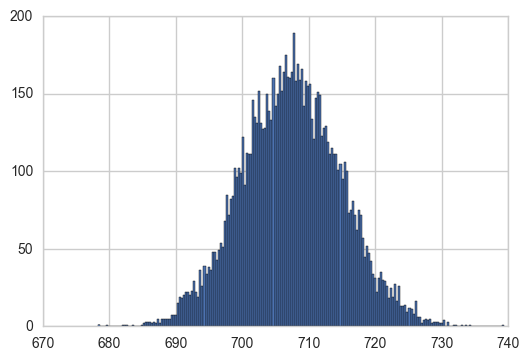

In [78]:
plt.hist(simulations,bins=200)

#最初７０５くらいなのに６８０とかになっちゃうvalue at risk

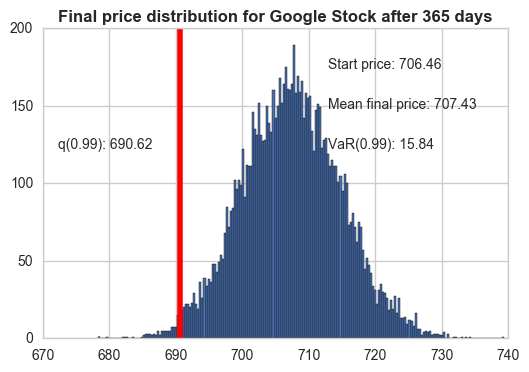

In [81]:
# 最終的な株価のヒストグラムを表示
plt.hist(simulations,bins=200)
# 1パーセンタイルの位置を設定
q = np.percentile(simulations, 1)

# プロットに追加的な情報

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描く
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');

シミュレーションで、グーグルの株価のVaRを計算することができた。<br>
1年という期間、99%の信頼区間でのVaRは、1株（707.43ドル）あたり、15.84ドルであることがわかります。99%の可能性で、損失はこれ以内に収まる計算になる。